Importing libraries

In [93]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import kendalltau
from sklearn.metrics import precision_score,recall_score ,f1_score,roc_curve, auc,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
from scipy.stats import randint as sp_randint


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


Reading Dataset and Exploring

In [3]:
data_train=pd.read_csv(r"C:\Users\pradeep\IDS_ML\KDDTrain+.txt")
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
data_test=pd.read_csv(r"C:\Users\pradeep\IDS_ML\KDDTest+.txt")
data_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

# Assign name for columns
data_train.columns = columns
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
# Assign name for columns
data_test.columns = columns
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
#check for duplicates
print(data_train.duplicated().sum())

0


In [ ]:
#checking for missing values
data_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
data_train.shape

(125972, 43)

In [ ]:
#attacks
data_train['outcome'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: outcome, dtype: int64

Function helps to classify different class labels into attack_types

In [ ]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

Creating new variable called "attack_type" where it classified different "class" labels to Dos, Probe, U2R, R2L and Normal

In [8]:
def encode_outcome(vec):
    if vec == "normal":
        return "normal"
    else:
        return "attack"

In [9]:
data_train['outcome_type'] = data_train['outcome'].apply(encode_outcome)

In [10]:
data_test['outcome_type'] = data_test['outcome'].apply(encode_outcome)

In [ ]:
data_test.groupby('attack_type').size()

attack_type
Dos       5740
Probe     1106
R2L       5949
U2R         37
normal    9711
dtype: int64

Percentage of data hold by different attack types

In [ ]:
percent_data = (data_train.groupby('attack_type').size())/data_train.shape[0] * 100
percent_data

attack_type
Dos       36.458102
Probe      9.252850
R2L        0.789858
U2R        0.041279
normal    53.457911
dtype: float64

Amount of different attack types hold the data
graph represents that "Normal" data holds 53.4%, "Dos" hold 36.46%, "Probe" attack type hold 9.2% of data and rest "R2L" and "U2R" are less than 1% data holds.

In [ ]:
percent_data_test = (data_test.groupby('attack_type').size())/data_test.shape[0] * 100
percent_data_test

attack_type
Dos       25.462450
Probe      4.906179
R2L       26.389567
U2R        0.164131
normal    43.077674
dtype: float64

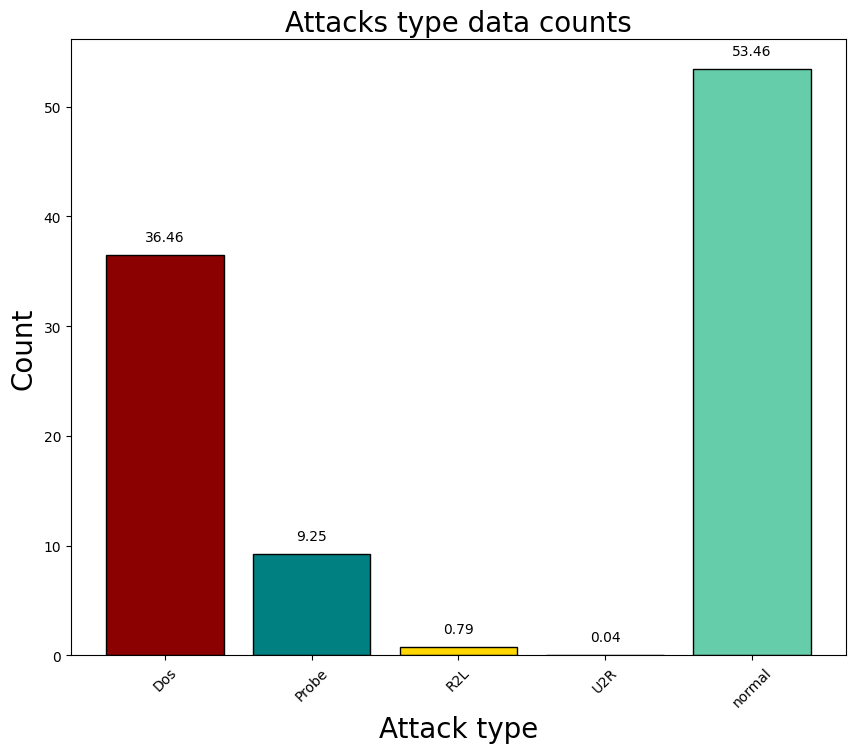

In [ ]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts training", fontsize = 20)

for i in range(len(percent_data.values)):
    plt.annotate(str(r_[i]), xy=(percent_data.index[i],r_[i]+1), ha='center', va='bottom')

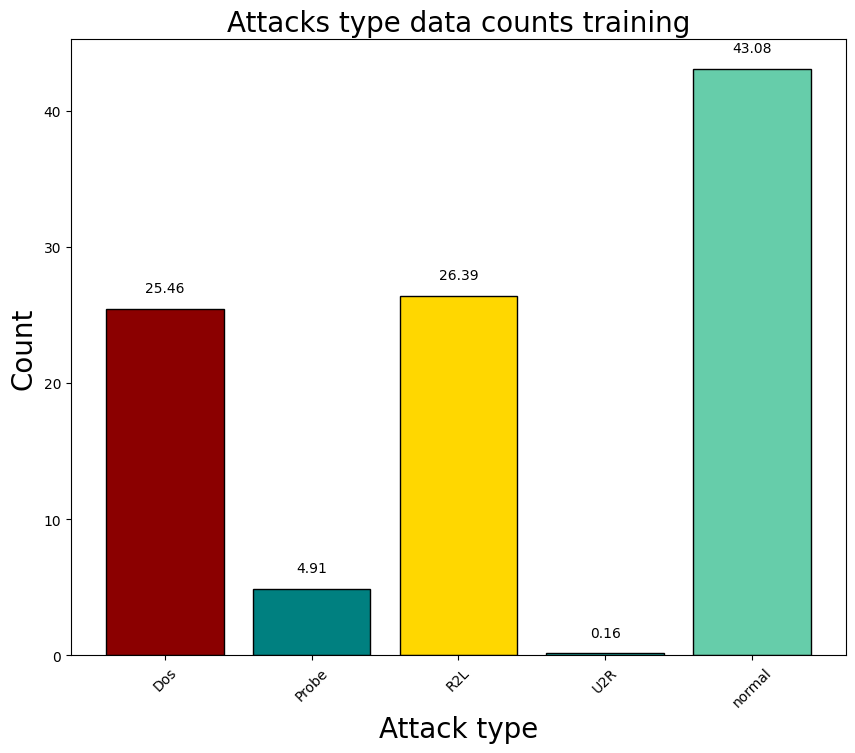

In [ ]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data_test.values]
ax = fig.add_subplot(111)
ax.bar(percent_data_test.index, percent_data_test.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data_test.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts training", fontsize = 20)

for i in range(len(percent_data_test.values)):
    plt.annotate(str(r_[i]), xy=(percent_data_test.index[i],r_[i]+1), ha='center', va='bottom')

Pie chart: Different types of attack types in data

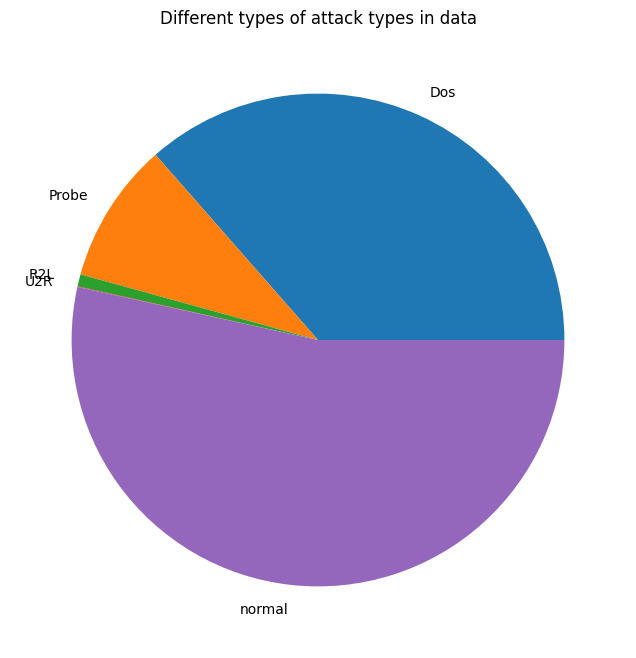

In [ ]:
group_data = data_train.groupby('attack_type').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Different types of attack types in data")
plt.ylabel("")
plt.show()

Different Protocol types

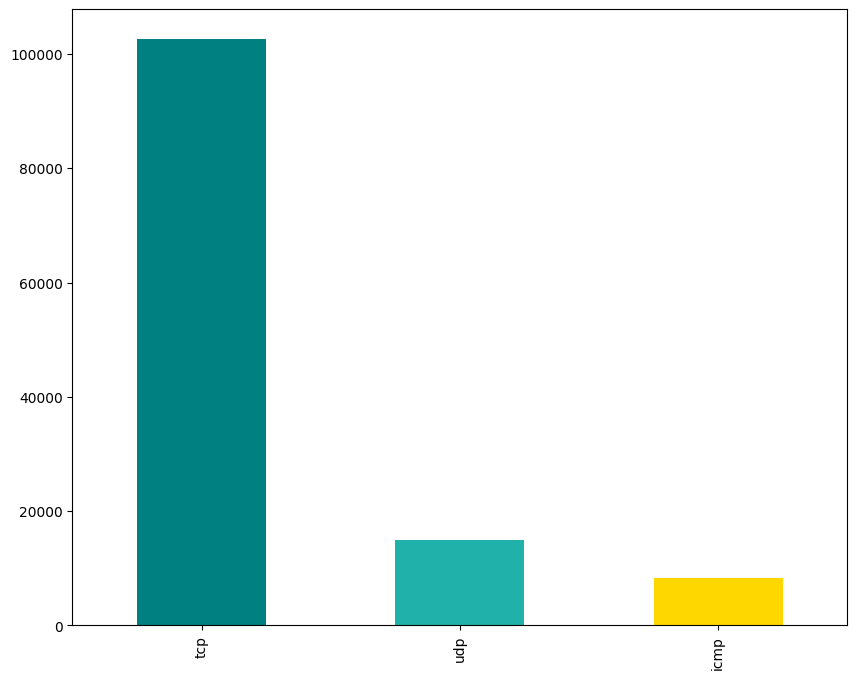

In [ ]:
plt.subplots(figsize=(10,8))
data_train['protocol_type'].value_counts(normalize = True)
data_train['protocol_type'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

In [13]:
data_train.shape

(125972, 44)

In [14]:
data_test.shape

(22543, 44)

Different protocols dependencies on attack types

<Figure size 1000x800 with 0 Axes>

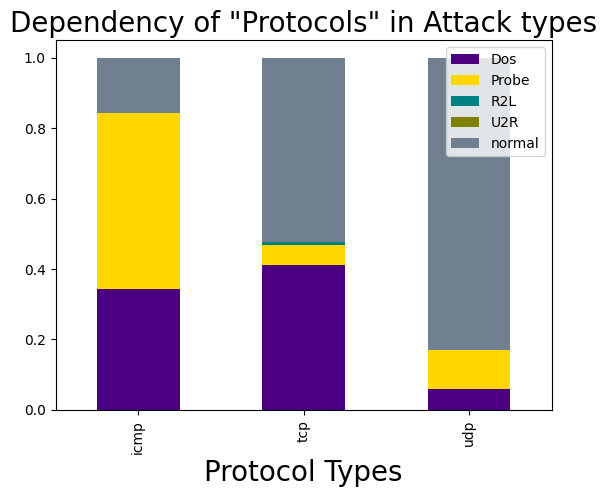

In [ ]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(data_train['protocol_type'], data_train['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', 'slategrey'])

plt.title('Dependency of "Protocols" in Attack types', fontsize = 20)
plt.xlabel('Protocol Types', fontsize = 20)
plt.legend()
plt.show()

Data preprocessing scaling and one hot encoding

In [ ]:
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [15]:
def outcome_encode(value):
    if value == 'normal':
        return 0;
    else:
        return 1;

In [16]:
data_train['outcome_code'] = data_train['outcome_type'].apply(outcome_encode)

In [17]:
data_test['outcome_code'] = data_test['outcome_type'].apply(outcome_encode)

In [18]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,outcome_type,outcome_code
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack,1
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,attack,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,attack,1
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,attack,1


Dropping class and attack_type variables as it was encoded in "intrusion_code"

In [19]:
data_train = data_train.drop(columns = ['outcome','level'])
data_test = data_test.drop(columns = ['outcome','level'])

In [25]:
data_train = data_train.drop(columns = ['outcome_type'])
data_test = data_test.drop(columns = ['outcome_type'])

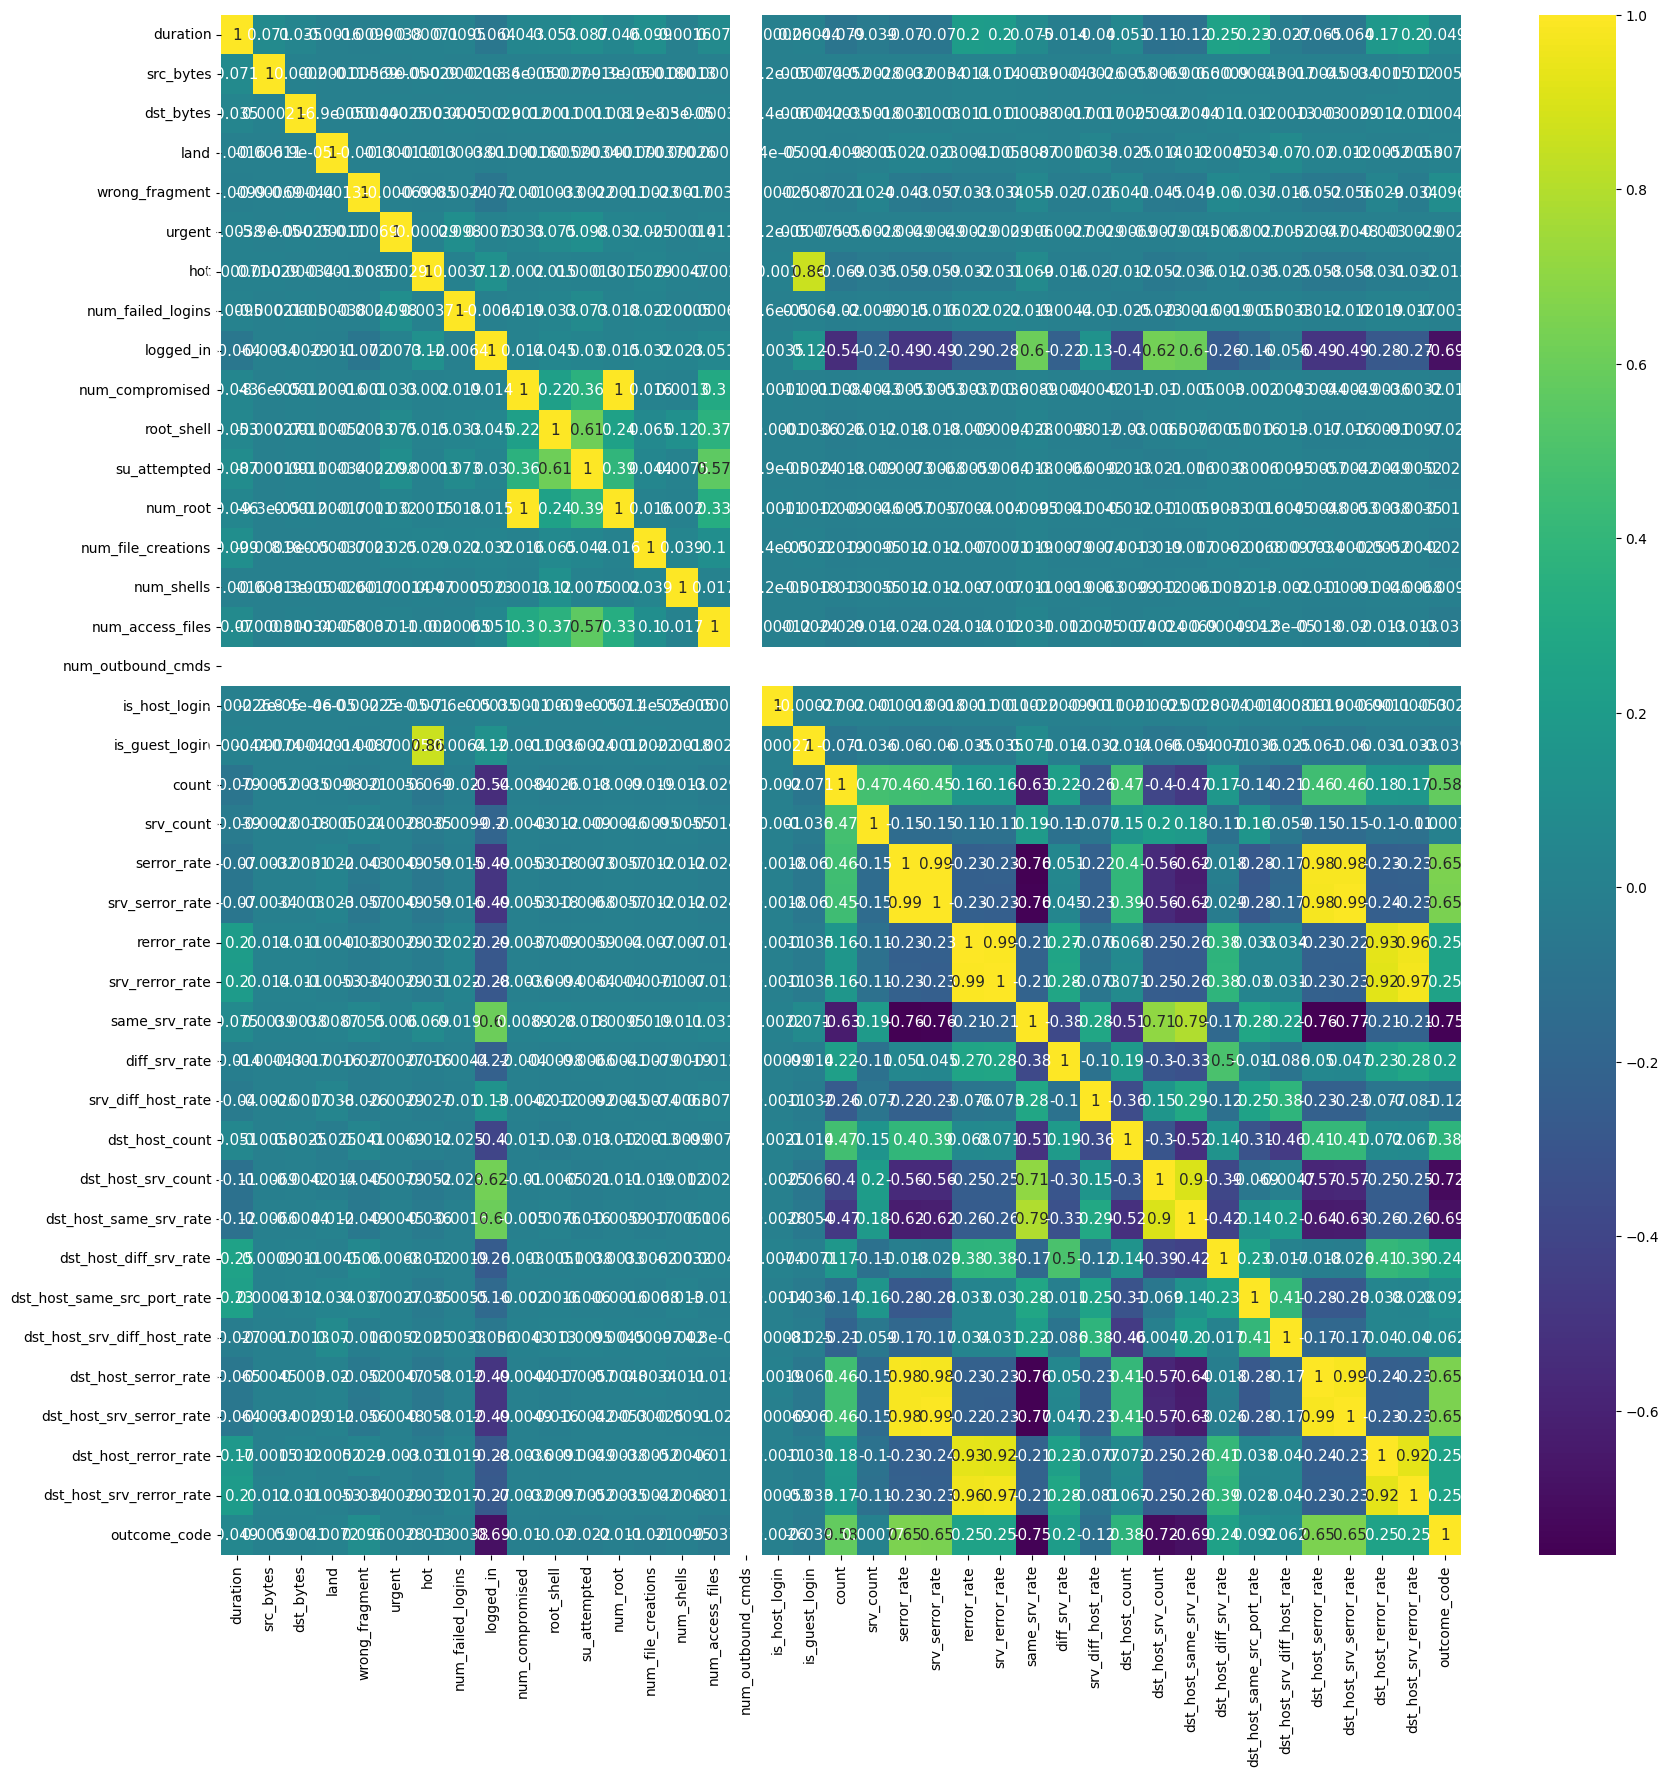

In [26]:
corr_df = data_train.corr()[data_train.corr().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

Feature Selection Techniques

Dense_fr feature selection method using Mutual information and kendalls correlation


In [27]:
data_train.corr()['outcome_code'].sort_values(ascending = False)

outcome_code                   1.000000
dst_host_srv_serror_rate       0.654984
dst_host_serror_rate           0.651840
serror_rate                    0.650651
srv_serror_rate                0.648287
count                          0.576442
dst_host_count                 0.375051
srv_rerror_rate                0.253502
dst_host_srv_rerror_rate       0.253428
rerror_rate                    0.253395
dst_host_rerror_rate           0.252562
dst_host_diff_srv_rate         0.242897
diff_srv_rate                  0.203658
wrong_fragment                 0.095905
dst_host_same_src_port_rate    0.092445
dst_host_srv_diff_host_rate    0.062330
duration                       0.048785
land                           0.007191
src_bytes                      0.005921
dst_bytes                      0.004118
srv_count                      0.000768
is_host_login                 -0.002629
urgent                        -0.002787
num_failed_logins             -0.003755
num_shells                    -0.009472


In [28]:
# Select only categorical variables
category_df = data_train.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['outcome_code'] =data_train['outcome_code']

dummy_df

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,outcome_code
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
125968,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
125969,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
125970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['outcome_code'].sort_values(ascending=False)

outcome_code          1.000000
flag_S0               0.650205
service_private       0.449718
protocol_type_icmp    0.200453
flag_REJ              0.184947
                        ...   
service_smtp         -0.212312
protocol_type_udp    -0.217188
service_domain_u     -0.258930
service_http         -0.562320
flag_SF              -0.756285
Name: outcome_code, Length: 85, dtype: float64

In [30]:
data_train = data_train.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])
data_test = data_test.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

In [31]:
data_train

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome_code
0,0,udp,other,SF,0,0,0,0,0,0,0,0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,tcp,http,SF,0,0,1,0,0,0,0,0,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,tcp,http,SF,0,0,1,0,0,0,0,0,0,0,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125968,8,udp,private,SF,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125969,0,tcp,smtp,SF,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [32]:
data_test

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome_code
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,0,0,0,0,0,0,0,0,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,0,0,0,0,0,0,0,0,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,0,0,0,0,0,0,0,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,0,0,1,0,0,0,0,0,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,0,0,1,0,0,0,0,0,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22539,0,tcp,http,SF,0,0,1,0,0,0,0,0,0,0,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,tcp,http,SF,0,2,1,1,0,0,0,0,0,0,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22541,0,udp,domain_u,SF,0,0,0,0,0,0,0,0,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


In [33]:
train_df_onehot = pd.get_dummies(data_train)
test_df_onehot = pd.get_dummies(data_test)

In [36]:
print (train_df_onehot.shape)
print (test_df_onehot.shape)

(125972, 114)
(22543, 108)


In [37]:
set(train_df_onehot.columns).difference(set(test_df_onehot))

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [38]:
train_df_onehot

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome_code,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125968,8,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [39]:
# Extract the target variable (outcome) and features

dense_train = train_df_onehot
X = dense_train.drop('outcome_code', axis=1)  # Features
y = dense_train['outcome_code']  # Target

In [40]:
X

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125968,8,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
# Compute Mutual Information (MI) scores for each feature
mi_scores = mutual_info_classif(X, y, random_state=42)
print("MI Scores for each feature:")
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

MI Scores for each feature:
duration: 0.0239
wrong_fragment: 0.0046
hot: 0.0083
logged_in: 0.2936
num_compromised: 0.0035
root_shell: 0.0027
su_attempted: 0.0000
num_root: 0.0010
num_file_creations: 0.0016
num_access_files: 0.0022
is_guest_login: 0.0000
count: 0.2653
serror_rate: 0.2777
srv_serror_rate: 0.2693
rerror_rate: 0.0394
srv_rerror_rate: 0.0367
same_srv_rate: 0.3690
diff_srv_rate: 0.3587
srv_diff_host_rate: 0.0972
dst_host_count: 0.1435
dst_host_srv_count: 0.3353
dst_host_same_srv_rate: 0.3103
dst_host_diff_srv_rate: 0.2859
dst_host_same_src_port_rate: 0.1305
dst_host_srv_diff_host_rate: 0.1888
dst_host_serror_rate: 0.2869
dst_host_srv_serror_rate: 0.2805
dst_host_rerror_rate: 0.0358
dst_host_srv_rerror_rate: 0.0618
protocol_type_icmp: 0.0217
protocol_type_tcp: 0.0156
protocol_type_udp: 0.0254
service_IRC: 0.0000
service_X11: 0.0000
service_Z39_50: 0.0029
service_aol: 0.0000
service_auth: 0.0018
service_bgp: 0.0077
service_courier: 0.0023
service_csnet_ns: 0.0023
service_ctf: 

In [42]:
# Compute Kendall's Correlation Coefficients for each feature
correlation_scores = []
for col in X.columns:
    corr, _ = kendalltau(X[col], y)
    correlation_scores.append(corr)
print("Kendall's Correlation Coefficients for each feature:")
for feature, score in zip(X.columns, correlation_scores):
    print(f"{feature}: {score:.4f}")

Kendall's Correlation Coefficients for each feature:
duration: -0.1475
wrong_fragment: 0.1001
hot: 0.0184
logged_in: -0.6902
num_compromised: 0.0496
root_shell: -0.0203
su_attempted: -0.0229
num_root: -0.0629
num_file_creations: -0.0332
num_access_files: -0.0478
is_guest_login: -0.0393
count: 0.4667
serror_rate: 0.6439
srv_serror_rate: 0.6242
rerror_rate: 0.2549
srv_rerror_rate: 0.2435
same_srv_rate: -0.6695
diff_srv_rate: 0.6272
srv_diff_host_rate: -0.3068
dst_host_count: 0.3613
dst_host_srv_count: -0.5816
dst_host_same_srv_rate: -0.5657
dst_host_diff_srv_rate: 0.5088
dst_host_same_src_port_rate: -0.2155
dst_host_srv_diff_host_rate: -0.3582
dst_host_serror_rate: 0.6143
dst_host_srv_serror_rate: 0.5857
dst_host_rerror_rate: 0.2073
dst_host_srv_rerror_rate: 0.1964
protocol_type_icmp: 0.2005
protocol_type_tcp: 0.0531
protocol_type_udp: -0.2172
service_IRC: -0.0356
service_X11: -0.0185
service_Z39_50: 0.0890
service_aol: 0.0043
service_auth: 0.0504
service_bgp: 0.0807
service_courier: 0.0

In [43]:
# Combine MI and Kendall's Correlation Scores
mi_ranked_indices = np.argsort(mi_scores)[::-1]
corr_ranked_indices = np.argsort(correlation_scores)[::-1]

# Divide MI and Kendall's Correlation into three parts as per Dense_FR approach
part1 = int(0.3 * len(X.columns))
part2 = int(0.6 * len(X.columns))

mi_part1 = mi_ranked_indices[:part1]
mi_part2 = mi_ranked_indices[part1:part2]
mi_part3 = mi_ranked_indices[part2:]

corr_part1 = corr_ranked_indices[:part1]
corr_part2 = corr_ranked_indices[part1:part2]
corr_part3 = corr_ranked_indices[part2:]

# Compute intersections of MI and Kendall's Correlation for each part
mc1 = list(set(mi_part1) & set(corr_part1))
mc2 = list(set(mi_part2) & set(corr_part2))
mc3 = list(set(mi_part3) & set(corr_part3))

# Compute Union of MC1, MC2, and MC3 to get the optimal feature subset
optimal_feature_subset = list(set(mc1) | set(mc2) | set(mc3))

print("Optimal Feature Subset")
print("Number of selected features:", len(optimal_feature_subset))

Optimal Feature Subset
Number of selected features: 62


In [46]:
# Sort the features in optimal_feature_subset by Kendall's Correlation score
optimal_feature_subset_sorted_by_corr = sorted(optimal_feature_subset, key=lambda feature_idx: correlation_scores[feature_idx], reverse=True)

# Print the ranked features
print("\nOptimal Features Sorted by Kendall's Correlation Score:")
for feature_idx in optimal_feature_subset_sorted_by_corr:
    print(f"{X.columns[feature_idx]},{correlation_scores[feature_idx]:.4f}")



Optimal Features Sorted by Kendall's Correlation Score:
flag_S0,0.6502
serror_rate,0.6439
diff_srv_rate,0.6272
srv_serror_rate,0.6242
dst_host_serror_rate,0.6143
dst_host_srv_serror_rate,0.5857
dst_host_diff_srv_rate,0.5088
count,0.4667
service_private,0.4497
dst_host_count,0.3613
rerror_rate,0.2549
srv_rerror_rate,0.2435
dst_host_rerror_rate,0.2073
protocol_type_icmp,0.2005
dst_host_srv_rerror_rate,0.1964
flag_REJ,0.1849
service_eco_i,0.1661
service_ecr_i,0.1500
flag_RSTR,0.1331
service_supdup,0.0706
service_daytime,0.0691
service_efs,0.0666
service_systat,0.0661
service_exec,0.0659
service_hostnames,0.0649
service_name,0.0642
service_mtp,0.0634
service_domain,0.0632
service_netbios_dgm,0.0609
service_sunrpc,0.0590
service_netbios_ns,0.0563
service_nntp,0.0520
num_compromised,0.0496
flag_SH,0.0491
service_rje,0.0280
service_pop_2,0.0267
service_remote_job,0.0267
service_printer,0.0251
service_shell,0.0215
flag_OTH,0.0113
service_pm_dump,0.0068
service_aol,0.0043
service_harvest,0.004

In [54]:
# Get the top 15 features based on Kendall's Correlation score
top_corr_features = [X.columns[feature_idx] for feature_idx in optimal_feature_subset_sorted_by_corr[:15]]

top_corr_features


['flag_S0',
 'serror_rate',
 'diff_srv_rate',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_diff_srv_rate',
 'count',
 'service_private',
 'dst_host_count',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'dst_host_srv_rerror_rate']

In [55]:
dense_train = dense_train[top_corr_features]
dense_train

,flag_S0,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_diff_srv_rate,count,service_private,dst_host_count,rerror_rate,srv_rerror_rate,dst_host_rerror_rate,protocol_type_icmp,dst_host_srv_rerror_rate
0,0,0.0,0.15,0.0,0.00,0.00,0.60,13,0,255,0.0,0.0,0.00,0,0.00
1,1,1.0,0.07,1.0,1.00,1.00,0.05,123,1,255,0.0,0.0,0.00,0,0.00
2,0,0.2,0.00,0.2,0.03,0.01,0.00,5,0,30,0.0,0.0,0.00,0,0.01
3,0,0.0,0.00,0.0,0.00,0.00,0.00,30,0,255,0.0,0.0,0.00,0,0.00
4,0,0.0,0.06,0.0,0.00,0.00,0.07,121,1,255,1.0,1.0,1.00,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,1.0,0.06,1.0,1.00,1.00,0.06,184,1,255,0.0,0.0,0.00,0,0.00
125968,0,0.0,0.00,0.0,0.00,0.00,0.01,2,1,255,0.0,0.0,0.00,0,0.00
125969,0,0.0,0.00,0.0,0.72,0.00,0.06,1,0,255,0.0,0.0,0.01,0,0.00
125970,1,1.0,0.05,1.0,1.00,1.00,0.05,144,0,255,0.0,0.0,0.00,0,0.00


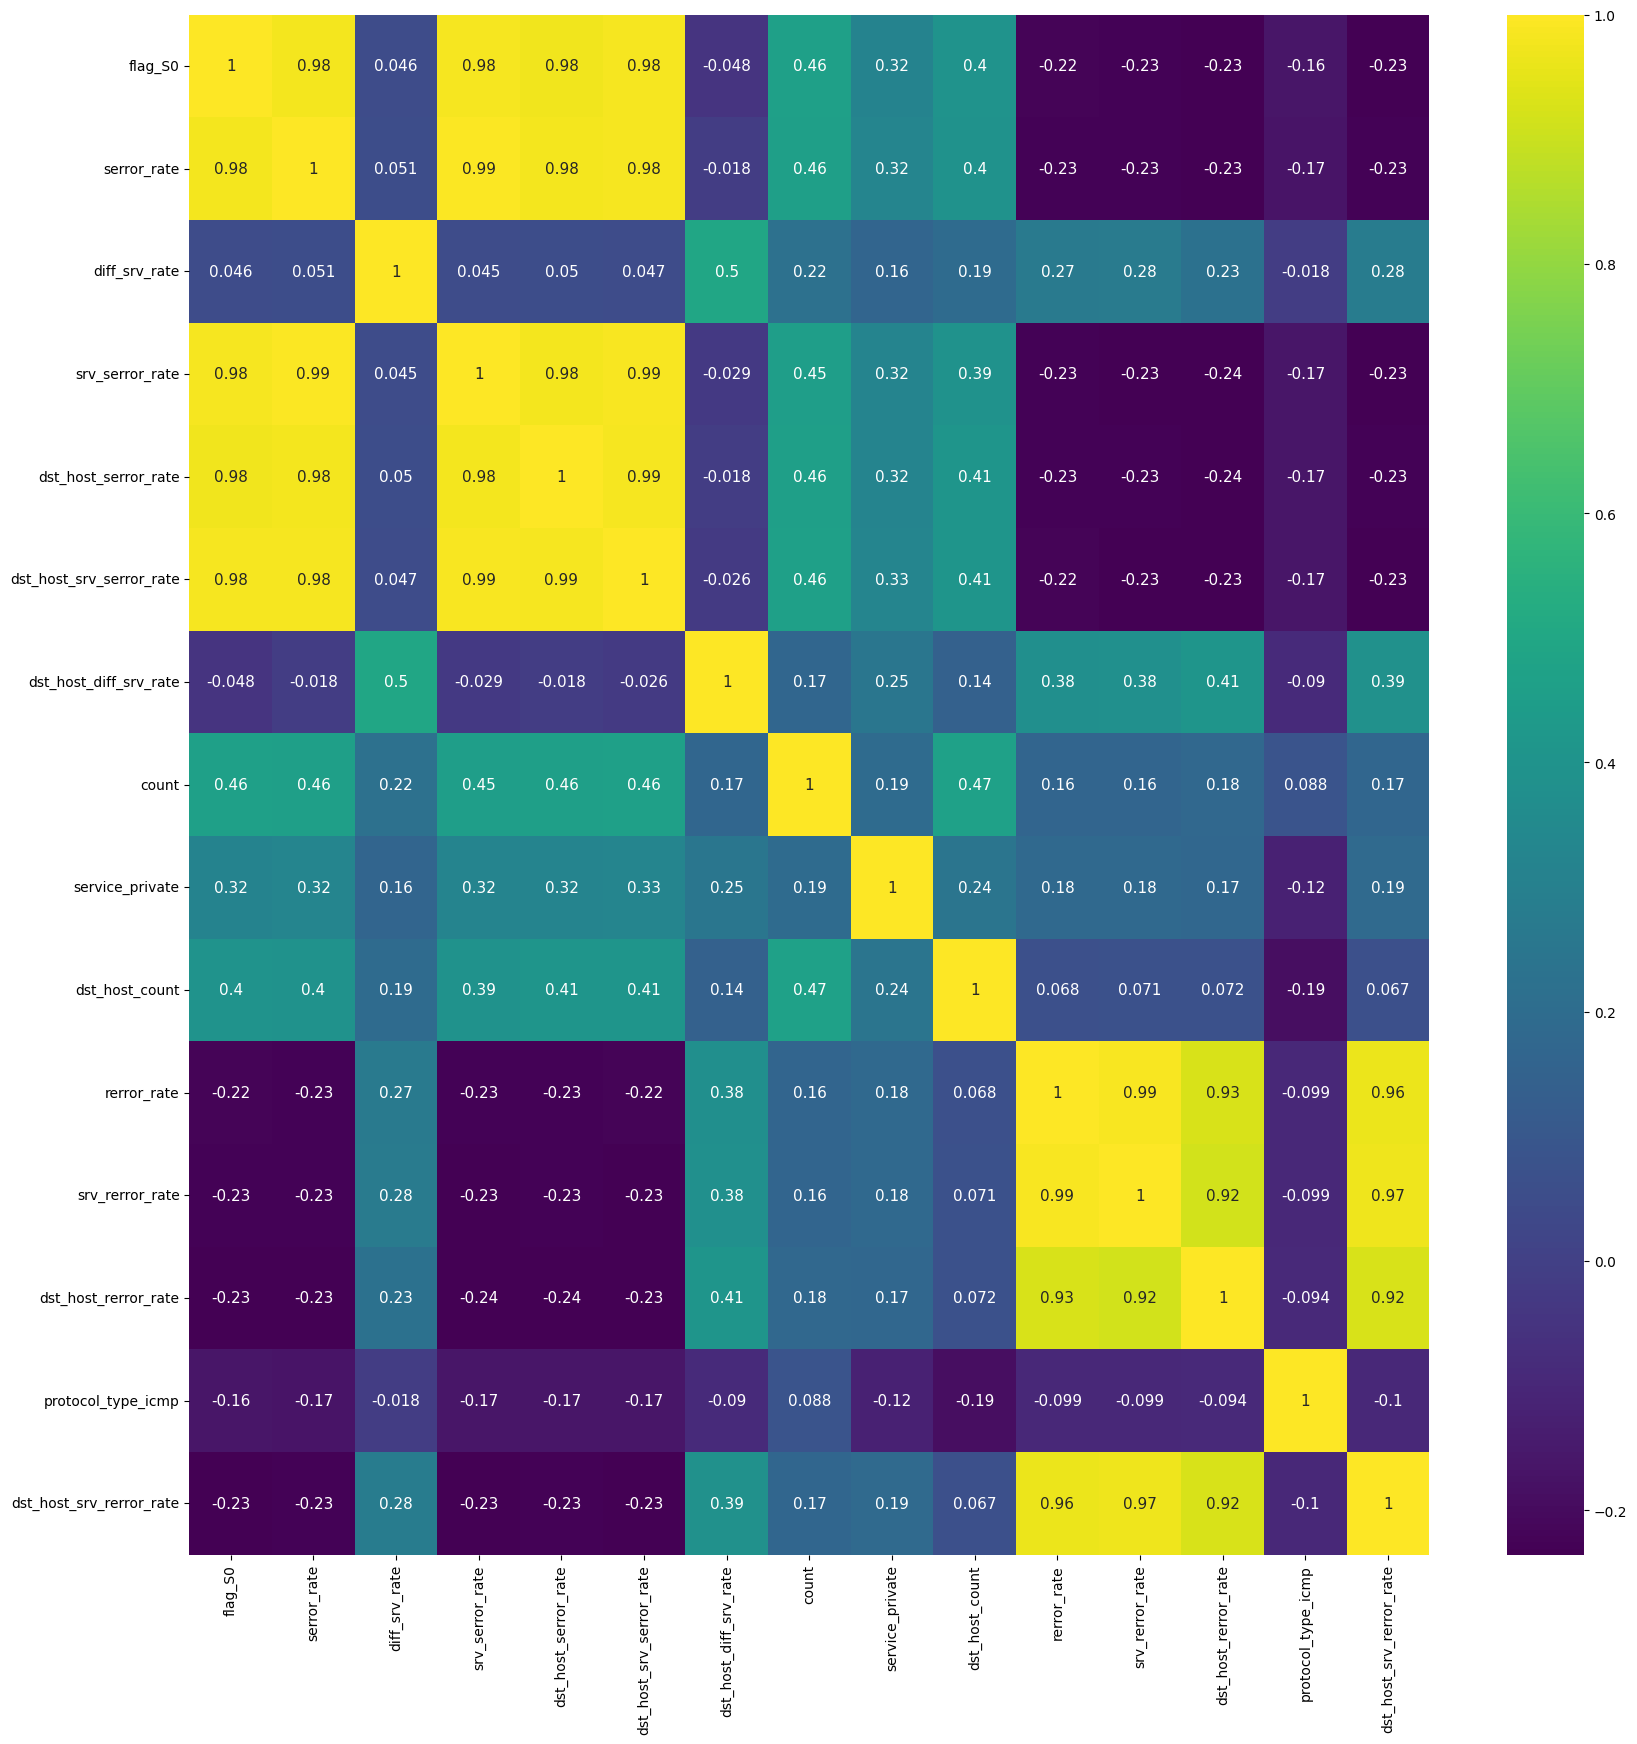

In [56]:
corr_df = dense_train.corr()[dense_train.corr().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

2nd feature selection SPARSE_FR 

In [51]:
# Assuming data_train contains your dataset

# Extract the target variable (outcome) and features
sparse_train = train_df_onehot
X_sparse = sparse_train.drop('outcome_code', axis=1)  # Features
y_sparse = sparse_train['outcome_code']  # Target

# Compute Mutual Information (MI) scores for each feature
mi_scores_sparse = mutual_info_classif(X_sparse, y_sparse, random_state=42)

# Compute Kendall's Correlation Coefficients for each feature
correlation_scores_sparse = []
for col in X_sparse.columns:
    corr, _ = kendalltau(X_sparse[col], y_sparse)
    correlation_scores_sparse.append(corr)

# Combine MI and Kendall's Correlation Scores
mi_ranked_indices_sparse = np.argsort(mi_scores_sparse)[::-1]
corr_ranked_indices_sparse = np.argsort(correlation_scores_sparse)[::-1]

# Divide MI and Kendall's Correlation into three parts as per Sparse_FR approach
part1_sparse = int(0.3 * len(X_sparse.columns))
part2_sparse = int(0.6 * len(X_sparse.columns))

mi_part1_sparse = mi_ranked_indices_sparse[:part1_sparse]
mi_part2_sparse = mi_ranked_indices_sparse[part1_sparse:part2_sparse]

corr_part1_sparse = corr_ranked_indices_sparse[:part1_sparse]
corr_part2_sparse = corr_ranked_indices_sparse[part1_sparse:part2_sparse]

# Compute intersections of MI and Kendall's Correlation for each part
mc1_sparse = list(set(mi_part1_sparse) & set(corr_part1_sparse))
mc2_sparse = list(set(mi_part2_sparse) & set(corr_part2_sparse))

# Compute Union of MC1 and MC2 to get the optimal feature subset
optimal_feature_subset_sparse = list(set(mc1_sparse) | set(mc2_sparse))

print("Optimal Feature Subset (Sparse_FR)")
print("Number of selected features:", len(optimal_feature_subset_sparse))



Optimal Feature Subset (Sparse_FR)
Number of selected features: 34


In [52]:

# Sort the features in optimal_feature_subset by Kendall's Correlation score
optimal_feature_subset_sorted_by_corr_sparse = sorted(optimal_feature_subset_sparse, key=lambda feature_idx: correlation_scores_sparse[feature_idx], reverse=True)

# Print the ranked features

print("\nOptimal Features Sorted by Kendall's Correlation Score:")
for feature_idx in optimal_feature_subset_sorted_by_corr_sparse:
    print(f"{X_sparse.columns[feature_idx]},{correlation_scores_sparse[feature_idx]:.4f}")



Optimal Features Sorted by Kendall's Correlation Score:
flag_S0,0.6502
serror_rate,0.6439
diff_srv_rate,0.6272
srv_serror_rate,0.6242
dst_host_serror_rate,0.6143
dst_host_srv_serror_rate,0.5857
dst_host_diff_srv_rate,0.5088
count,0.4667
service_private,0.4497
dst_host_count,0.3613
rerror_rate,0.2549
srv_rerror_rate,0.2435
dst_host_rerror_rate,0.2073
protocol_type_icmp,0.2005
dst_host_srv_rerror_rate,0.1964
flag_REJ,0.1849
service_eco_i,0.1661
service_ecr_i,0.1500
flag_RSTR,0.1331
service_supdup,0.0706
service_daytime,0.0691
service_efs,0.0666
service_systat,0.0661
service_exec,0.0659
service_hostnames,0.0649
service_name,0.0642
service_mtp,0.0634
service_domain,0.0632
service_netbios_dgm,0.0609
service_sunrpc,0.0590
service_netbios_ns,0.0563
service_nntp,0.0520
num_compromised,0.0496
flag_SH,0.0491


In [57]:
# Get the top 20 features based on Kendall's Correlation score
top_corr_features_sparse = [X_sparse.columns[feature_idx] for feature_idx in optimal_feature_subset_sorted_by_corr_sparse[:15]]

top_corr_features_sparse


['flag_S0',
 'serror_rate',
 'diff_srv_rate',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_diff_srv_rate',
 'count',
 'service_private',
 'dst_host_count',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'dst_host_srv_rerror_rate']

In [58]:
# Extract the target variable (outcome) and features

sparse_train = train_df_onehot
sparse_test = test_df_onehot

In [59]:
sparse_train  = sparse_train[top_corr_features_sparse]
sparse_test  = sparse_test[top_corr_features_sparse]

In [60]:
sparse_train

,flag_S0,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_diff_srv_rate,count,service_private,dst_host_count,rerror_rate,srv_rerror_rate,dst_host_rerror_rate,protocol_type_icmp,dst_host_srv_rerror_rate
0,0,0.0,0.15,0.0,0.00,0.00,0.60,13,0,255,0.0,0.0,0.00,0,0.00
1,1,1.0,0.07,1.0,1.00,1.00,0.05,123,1,255,0.0,0.0,0.00,0,0.00
2,0,0.2,0.00,0.2,0.03,0.01,0.00,5,0,30,0.0,0.0,0.00,0,0.01
3,0,0.0,0.00,0.0,0.00,0.00,0.00,30,0,255,0.0,0.0,0.00,0,0.00
4,0,0.0,0.06,0.0,0.00,0.00,0.07,121,1,255,1.0,1.0,1.00,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,1.0,0.06,1.0,1.00,1.00,0.06,184,1,255,0.0,0.0,0.00,0,0.00
125968,0,0.0,0.00,0.0,0.00,0.00,0.01,2,1,255,0.0,0.0,0.00,0,0.00
125969,0,0.0,0.00,0.0,0.72,0.00,0.06,1,0,255,0.0,0.0,0.01,0,0.00
125970,1,1.0,0.05,1.0,1.00,1.00,0.05,144,0,255,0.0,0.0,0.00,0,0.00


In [134]:
sparse_test

,flag_S0,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_diff_srv_rate,count,service_private,dst_host_count,rerror_rate,srv_rerror_rate,dst_host_rerror_rate,protocol_type_icmp,dst_host_srv_rerror_rate
0,0,0.0,0.06,0.00,0.00,0.0,0.06,136,1,255,1.0,1.0,1.00,0,1.00
1,0,0.0,0.00,0.00,0.00,0.0,0.04,1,0,134,0.0,0.0,0.00,0,0.00
2,0,0.0,0.00,0.00,0.00,0.0,0.00,1,0,3,0.0,0.0,0.00,1,0.00
3,0,0.0,0.00,0.12,0.00,0.0,0.17,1,0,29,1.0,0.5,0.83,0,0.71
4,0,0.0,0.00,0.00,0.01,0.0,0.00,4,0,155,0.0,0.0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0.0,0.00,0.00,0.01,0.0,0.06,1,0,100,0.0,0.0,0.00,0,0.00
22539,0,0.0,0.00,0.00,0.01,0.0,0.00,2,0,197,0.0,0.0,0.00,0,0.00
22540,0,0.0,0.00,0.00,0.00,0.0,0.00,5,0,255,0.0,0.0,0.07,0,0.07
22541,0,0.0,0.00,0.00,0.00,0.0,0.01,4,0,255,0.0,0.0,0.00,0,0.00


In [141]:
unique_flags = data_train['service'].unique()
print(unique_flags)


['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


In [142]:
unique_flags = data_train['flag'].unique()
print(unique_flags)


['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [143]:
unique_flags = data_train['protocol_type'].unique()
print(unique_flags)

['udp' 'tcp' 'icmp']


In [136]:
data_test

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome_code
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,0,0,0,0,0,0,0,0,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,0,0,0,0,0,0,0,0,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,0,0,0,0,0,0,0,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,0,0,1,0,0,0,0,0,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,0,0,1,0,0,0,0,0,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22539,0,tcp,http,SF,0,0,1,0,0,0,0,0,0,0,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,tcp,http,SF,0,2,1,1,0,0,0,0,0,0,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22541,0,udp,domain_u,SF,0,0,0,0,0,0,0,0,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


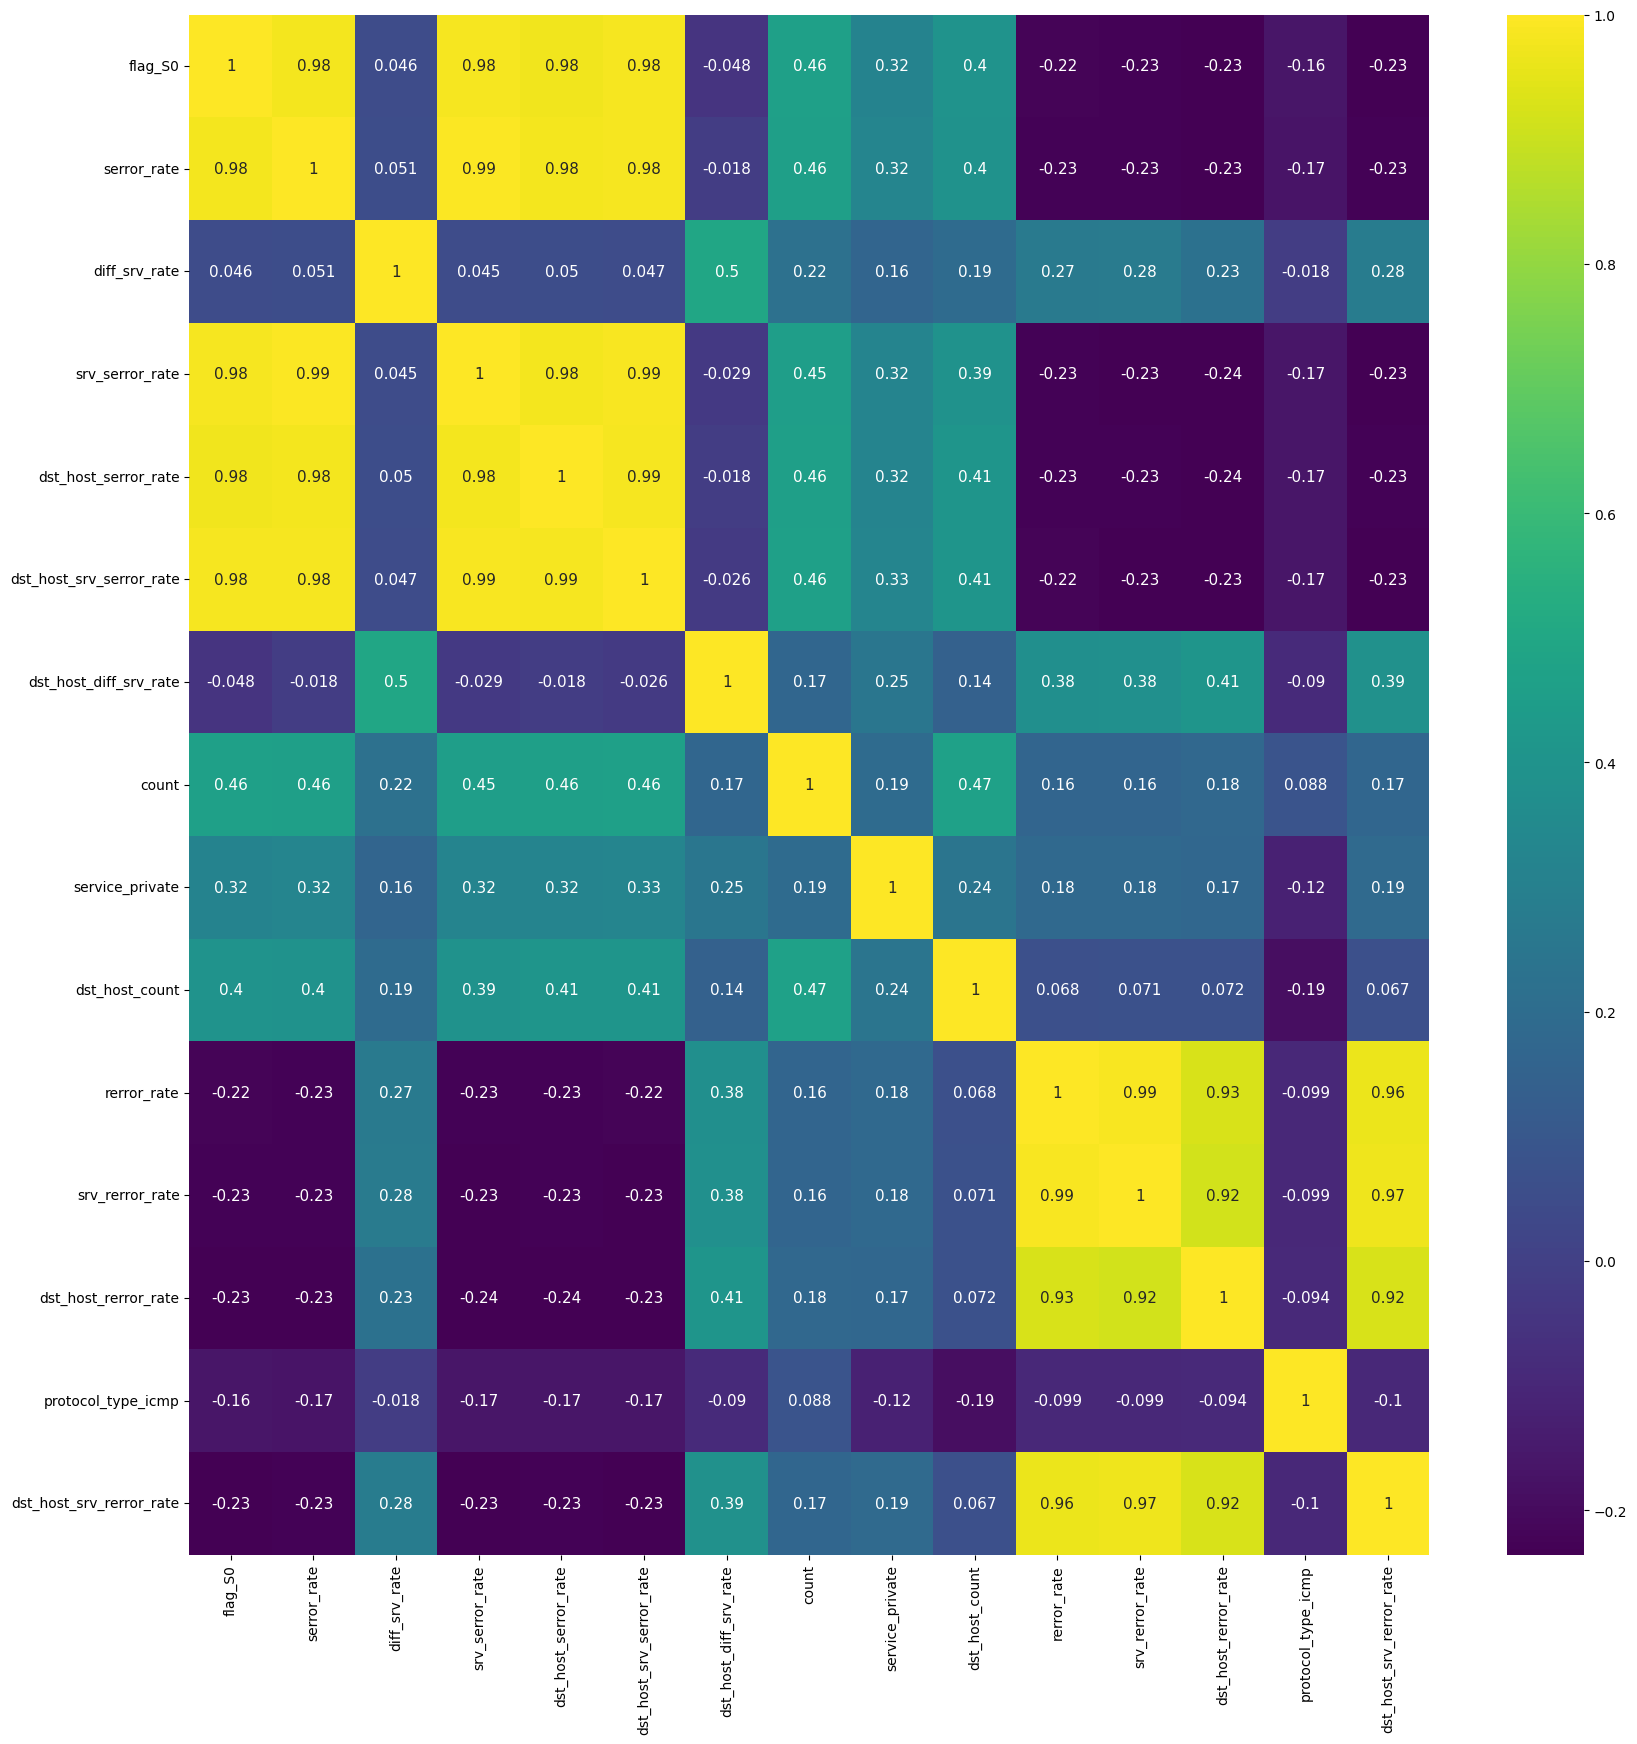

In [62]:
corr_df_sparse = sparse_train.corr()[sparse_train.corr().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df_sparse, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

MOdels

In [63]:
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes


Preparing X (feature set variables) and y(target variable)



In [66]:
X_tr = sparse_train
y_tr = data_train['outcome_code']

X_te = sparse_test
y_te = data_test['outcome_code']

In [67]:
X_tr.shape , X_te.shape

((125972, 15), (22543, 15))

In [68]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):

    # C = 2,2  matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)

    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1


    A =(((C.T)/(C.sum(axis=1))).T)


    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]

    B =(C/C.sum(axis=0))


    labels = [0,1]
    cmap=sns.light_palette("green")

    #Confusion matrix

    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    #Precision matrix

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    #Recall matrix


    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [69]:
def hyperparameter_of_the_model(model,parameters,X_train,y_train):

    #use gridsearch to test all values
    clf = RandomizedSearchCV(model,
                             parameters,
                             n_iter=5,
                             cv=10 ,
                             refit = True,
                             verbose = 3,
                             scoring='roc_auc',
                             return_train_score=True,
                             n_jobs=-1)


    #fit model to data
    clf.fit(X_train, y_train)

    #find the best tuned parameters
    best_parameter=clf.best_estimator_
    print("Best hyper parameter of the model is " , best_parameter)

Logistic regression
Find the best hyper parameter

In [75]:
#Parameter input values
parameters = {
    'C': [0.00001,0.0001, 0.001,0.01,0.1,1,5,10,50,100],
    'max_iter': list(range(100,800,100))
}

#model input
model = LogisticRegression()

hyperparameter_of_the_model(model,parameters,X_tr,y_tr)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  LogisticRegression(C=50, max_iter=200)


Train the model with best parameters

In [78]:
#train with best hyperparameters
final_model=LogisticRegression(C=50, max_iter=200)

#model train
final_model.fit(X_tr , y_tr)

LogisticRegression(C=50, max_iter=200)

In [80]:
#save model
joblib.dump(final_model, r'C:\Users\pradeep\Desktop\ml_models\LogisticRegression_without_sampling.joblib')


['C:\\Users\\pradeep\\Desktop\\ml_models\\LogisticRegression_without_sampling.joblib']

In [81]:
#predict the model output

y_train_pred = final_model.predict(X_tr)

y_test_pred = final_model.predict(X_te)

In [83]:
print('Train f1 score',f1_score(y_tr,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_te,y_test_pred))

Train f1 score 0.9590309574249983
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.7211293682018051


In [84]:
print('Train precision score',precision_score(y_tr,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_te,y_test_pred))

Train precision score 0.9606393538008694
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.8879516698962726


In [123]:
print('Train accuracy score',accuracy_score(y_tr,y_train_pred))

print("*-"*25)

print('Test accuracy score',accuracy_score(y_te,y_test_pred))

Train accuracy score 0.9774632458006541
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test accuracy score 0.7593931597391651


In [85]:
print('Train recall score',recall_score(y_tr,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_te,y_test_pred))

Train recall score 0.9574279379157428
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.607076059850374


 Train confusion matrix 
Number of misclassified points  3.807195249738037
-------------------------------------------------- Confusion matrix --------------------------------------------------


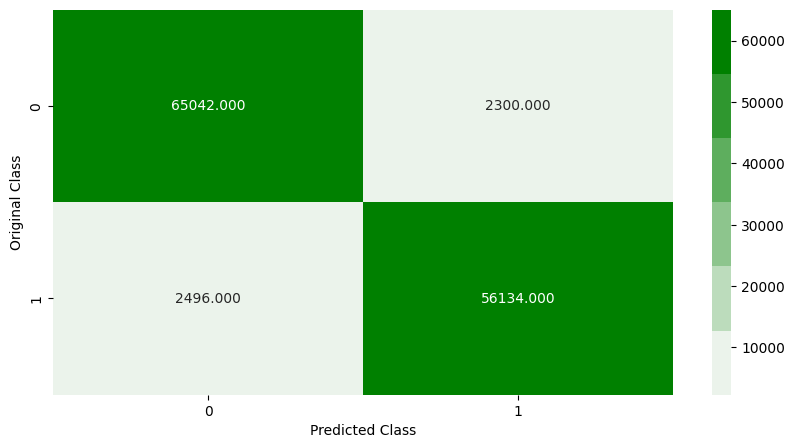

-------------------------------------------------- Precision matrix --------------------------------------------------


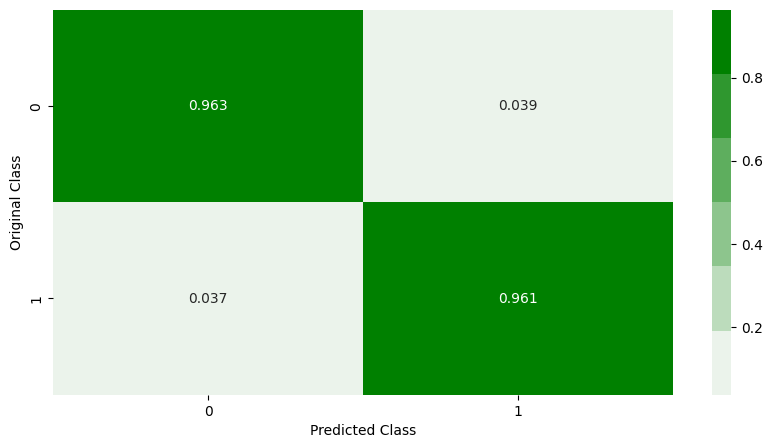

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


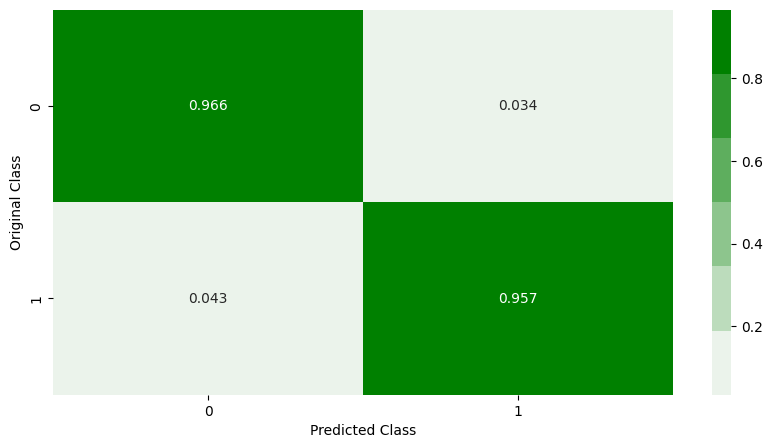

Sum of rows in precision matrix [1. 1.]


In [86]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_tr, y_train_pred)

 Test confusion matrix 
Number of misclassified points  26.726700084283365
-------------------------------------------------- Confusion matrix --------------------------------------------------


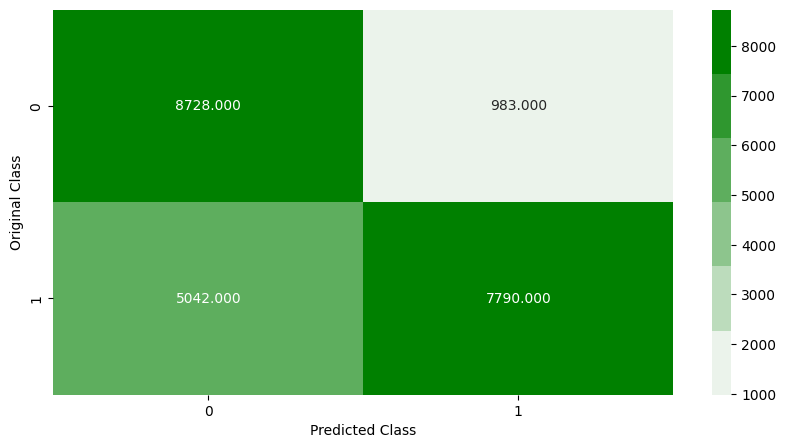

-------------------------------------------------- Precision matrix --------------------------------------------------


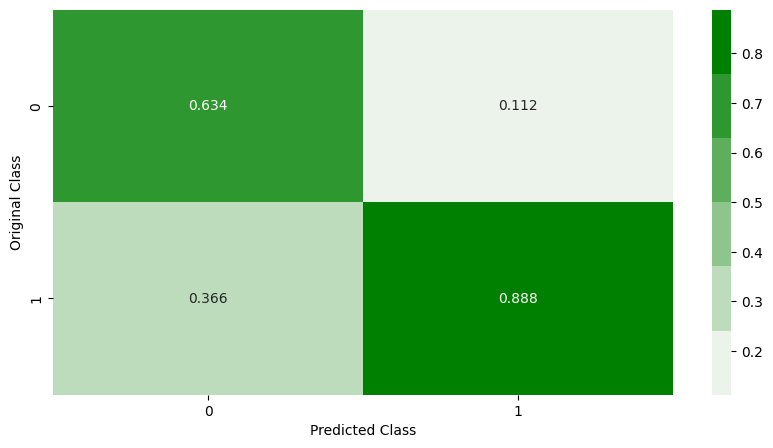

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


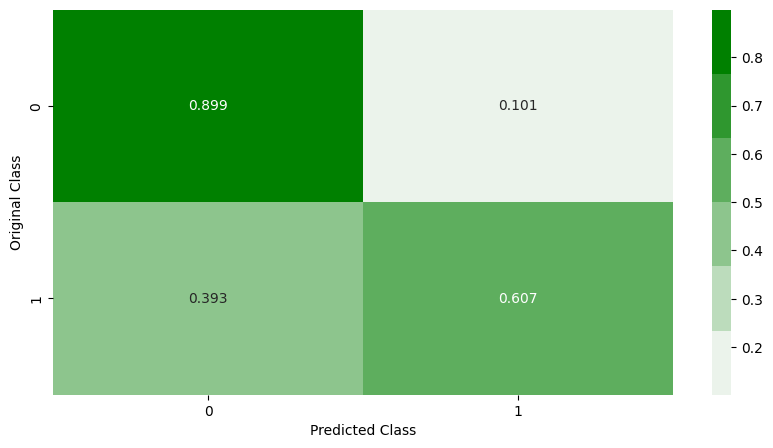

Sum of rows in precision matrix [1. 1.]


In [88]:
print(" Test confusion matrix ")
plot_confusion_matrix(y_te, y_test_pred)

In [90]:
final_model = joblib.load(r'C:\Users\pradeep\Desktop\ml_models\LogisticRegression_without_sampling.joblib')

Random Forest
Find the best hyper parameter

In [94]:
#Parameter input values
parameters = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

#model input
model=RandomForestClassifier()

hyperparameter_of_the_model(model,parameters,X_tr,y_tr)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  RandomForestClassifier(max_depth=14, min_samples_leaf=50, min_samples_split=133,
                       n_estimators=113)


Fitting 10 folds for each of 5 candidates, totalling 50 fits - 
This indicates that a total of 50 fits were performed during the hyperparameter tuning process.
The process involves fitting the Random Forest Classifier model with different combinations of hyperparameters to the training data.
Each fit is evaluated using 10-fold cross-validation, where the training data is split into 10 subsets (folds), and the model is trained and evaluated 10 times, each time using a different fold as the validation set and the remaining folds as the training set.
Best hyper parameter of the model is  RandomForestClassifier(max_depth=14, min_samples_leaf=50, min_samples_split=133,
                       n_estimators=113)
This indicates that the best combination of hyperparameters found during the hyperparameter tuning process is:
max_depth=14: Maximum depth of each tree in the Random Forest is 14.
min_samples_leaf=50: Minimum number of samples required to be at a leaf node is 50.
min_samples_split=133: Minimum number of samples required to split an internal node is 133.
n_estimators=113: Number of trees in the Random Forest is 113.

In [129]:
#train with best hyperparameters
final_model=RandomForestClassifier(max_depth=14, min_samples_leaf=50, min_samples_split=133,n_estimators=113)

#model train
final_model.fit(X_tr , y_tr)

#save model
joblib.dump(final_model, r'C:\Users\pradeep\Desktop\ml_models\RandomForestClassifier_without_sampling.joblib')


['C:\\Users\\pradeep\\Desktop\\ml_models\\RandomForestClassifier_without_sampling.joblib']

In [96]:
#predict the model output

y_train_pred = final_model.predict(X_tr)

y_test_pred = final_model.predict(X_te)

In [97]:
print('Train f1 score',f1_score(y_tr,y_train_pred))

print("*-"*25)

print('Test f1 score',f1_score(y_te,y_test_pred))

Train f1 score 0.9796847179398099
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test f1 score 0.7151841868823


In [98]:
print('Train precision score',precision_score(y_tr,y_train_pred))

print("*-"*25)

print('Test precision score',precision_score(y_te,y_test_pred))

Train precision score 0.9981063622688258
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test precision score 0.9094407696933253


In [99]:
print('Train recall score',recall_score(y_tr,y_train_pred))

print("*-"*25)

print('Test recall score',recall_score(y_te,y_test_pred))

Train recall score 0.9619307521746546
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test recall score 0.5893079800498753


 Train confusion matrix 
Number of misclassified points  1.8567618200870033
-------------------------------------------------- Confusion matrix --------------------------------------------------


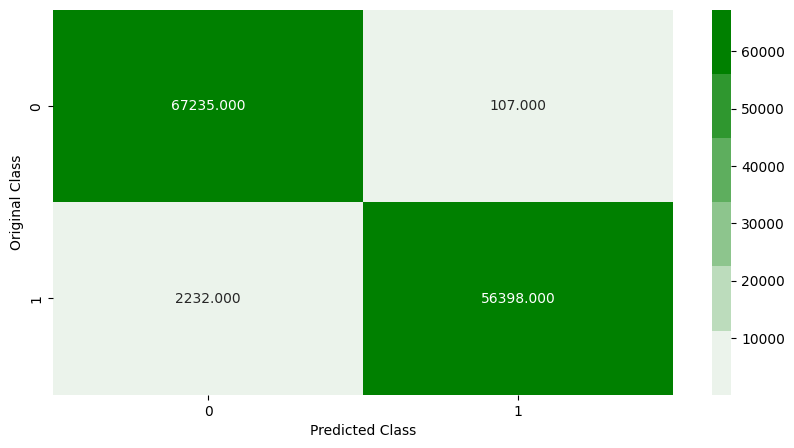

-------------------------------------------------- Precision matrix --------------------------------------------------


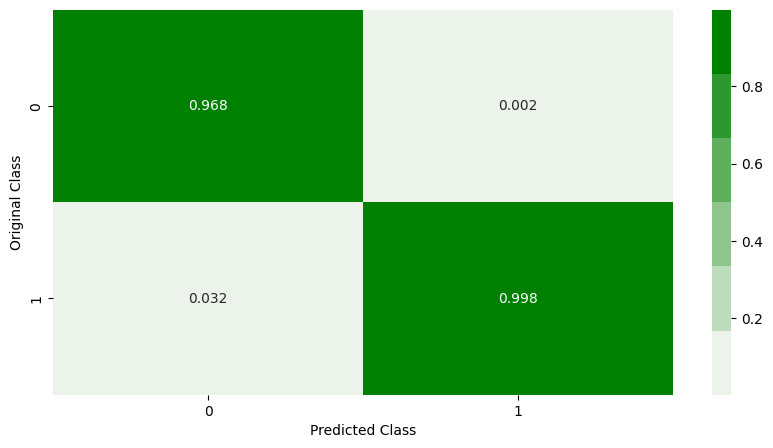

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


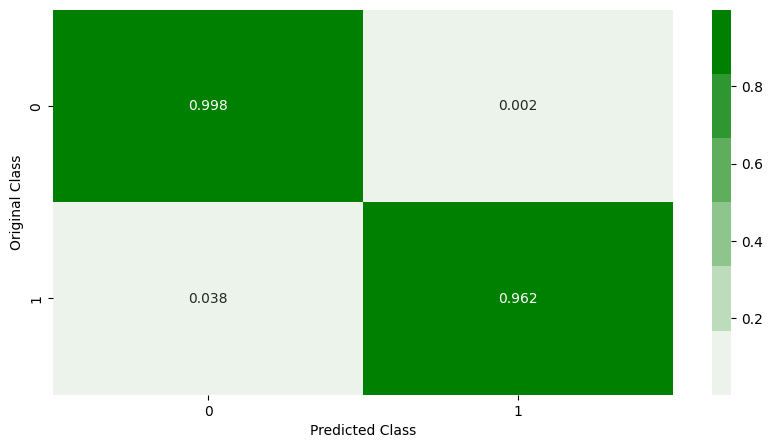

Sum of rows in precision matrix [1. 1.]


In [100]:
#Confusion Matrix

print(" Train confusion matrix ")
plot_confusion_matrix(y_tr, y_train_pred)

Standardizing data using StandardScaler

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, accuracy_score
import joblib

# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_tr, y_tr)

predictions = dtree.predict(X_te)

# Calculate precision, recall, and accuracy for both the training and test sets
train_precision = precision_score(y_tr, dtree.predict(X_tr))
test_precision = precision_score(y_te, predictions)

train_recall = recall_score(y_tr, dtree.predict(X_tr))
test_recall = recall_score(y_te, predictions)

train_accuracy = accuracy_score(y_tr, dtree.predict(X_tr))
test_accuracy = accuracy_score(y_te, predictions)

# Confusion Matrix
print("Test confusion matrix")
cm = confusion_matrix(y_te, predictions)
print(cm)
print("Accuracy of prediction:", round((cm[0, 0] + cm[1, 1]) / cm.sum(), 3))

# Tabular representation of precision, recall, and accuracy
import pandas as pd

results = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'Accuracy': [train_accuracy, test_accuracy]
})

print(results)

# Save the model
joblib.dump(dtree, r'C:\Users\pradeep\Desktop\ml_models\DecisionTreeClassifier_without_sampling.joblib')


Test confusion matrix
[[8874  837]
 [4860 7972]]
Accuracy of prediction: 0.747
     Set  Precision    Recall  Accuracy
0  Train   0.999308  0.984769  0.992594
1   Test   0.904984  0.621259  0.747283


['C:\\Users\\pradeep\\Desktop\\ml_models\\DecisionTreeClassifier_without_sampling.joblib']

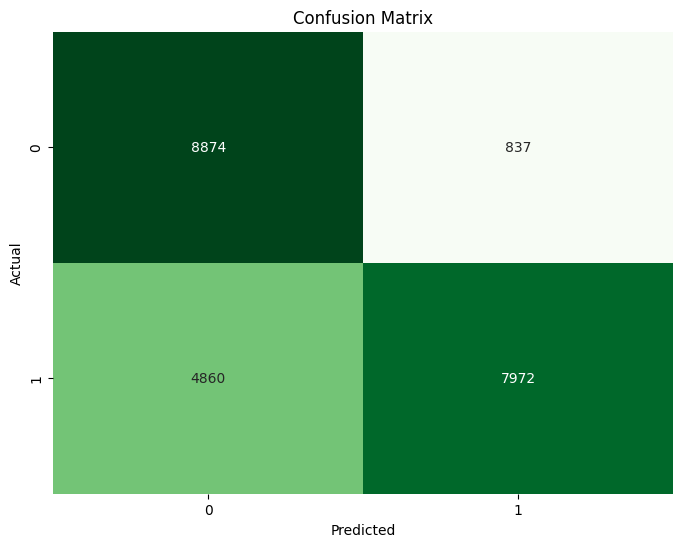

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [112]:
# Save the model
joblib.dump(dtree, r'C:\Users\pradeep\Desktop\ml_models\KNN_classifier.joblib')


['C:\\Users\\pradeep\\Desktop\\ml_models\\KNN_classifier.joblib']

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter of the model is  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)
Train precision score: 0.9993076829880402
Test precision score: 0.9051086585504609
Train recall score: 0.9847688896469384
Test recall score: 0.6199345386533666
Train confusion matrix:


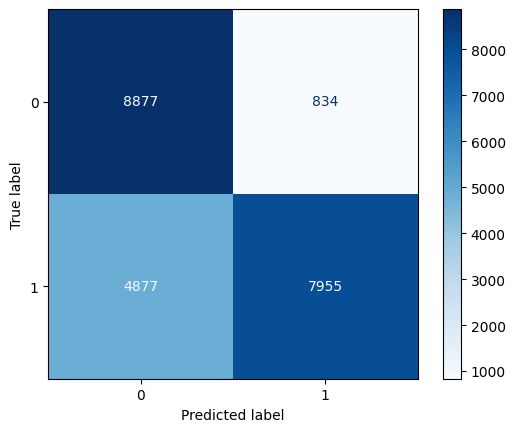

In [116]:
# Parameter input values
parameters = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Model input
model = DecisionTreeClassifier()

hyperparameter_of_the_model(model, parameters, X_tr, y_tr)

# Best hyperparameters
best_params = {
    "criterion": 'gini',
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1
}

# Train with best hyperparameters
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_tr, y_tr)

# Save model
joblib.dump(final_model, r'C:\Users\pradeep\Desktop\ml_models\DecisionTreeClassifier.joblib')

# Predict the model output
y_train_pred = final_model.predict(X_tr)
y_test_pred = final_model.predict(X_te)

print("Train precision score:", precision_score(y_tr, y_train_pred))
print("Test precision score:", precision_score(y_te, y_test_pred))

print("Train recall score:", recall_score(y_tr, y_train_pred))
print("Test recall score:", recall_score(y_te, y_test_pred))

# Confusion Matrix
print("Train confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_te, y_test_pred), display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

In [117]:
# Accuracy
train_accuracy = accuracy_score(y_tr, y_train_pred)
test_accuracy = accuracy_score(y_te, y_test_pred)

# F1 Score
train_f1 = f1_score(y_tr, y_train_pred)
test_f1 = f1_score(y_te, y_test_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train F1 Score: 0.991985018083105
Test F1 Score: 0.7358586559363581
Train Accuracy: 0.9925935922268441
Test Accuracy: 0.7466619349687265


(ii) KNN Classification

              precision    recall  f1-score   support

           0       0.66      0.92      0.77      9711
           1       0.92      0.64      0.75     12832

    accuracy                           0.76     22543
   macro avg       0.79      0.78      0.76     22543
weighted avg       0.80      0.76      0.76     22543

[[8969  742]
 [4682 8150]]
Accuracy of prediction: 0.759


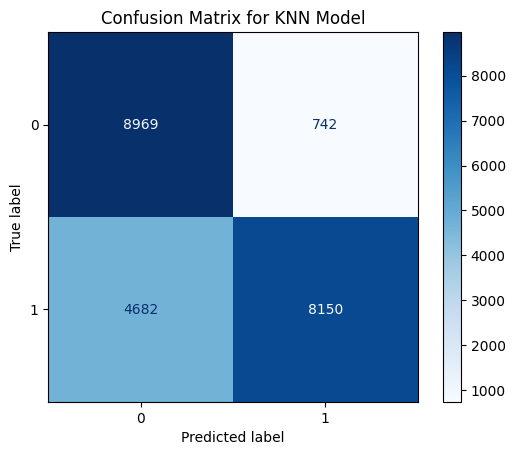

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)

# Make predictions on the test set
pred = knn.predict(X_te)

# Print classification report and confusion matrix
print(classification_report(y_te, pred))
cm1 = confusion_matrix(y_te, pred)
print(cm1)
print("Accuracy of prediction:", round((cm1[0, 0] + cm1[1, 1]) / cm1.sum(), 3))

# Display confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=knn.classes_)
disp1.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for KNN Model')
plt.show()


In [131]:
import pickle

with open('KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)


In [121]:
# Create an instance of KNeighborsClassifier() called knn and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)

# Predictions
y_train_pred = knn.predict(X_tr)
y_test_pred = knn.predict(X_te)

# Accuracy, Precision, Recall, and F1 Score
train_accuracy = accuracy_score(y_tr, y_train_pred)
test_accuracy = accuracy_score(y_te, y_test_pred)
train_precision = precision_score(y_tr, y_train_pred)
test_precision = precision_score(y_te, y_test_pred)
train_recall = recall_score(y_tr, y_train_pred)
test_recall = recall_score(y_te, y_test_pred)
train_f1 = f1_score(y_tr, y_train_pred)
test_f1 = f1_score(y_te, y_test_pred)

# Print Accuracy, Precision, Recall, and F1 Score
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)


Train Accuracy: 0.9774632458006541
Test Accuracy: 0.7593931597391651
Train Precision: 0.9908500642255107
Test Precision: 0.9165542060278903
Train Recall: 0.9604468702029678
Test Recall: 0.6351309226932669
Train F1 Score: 0.9754116108469527
Test F1 Score: 0.7503222242680906


In [147]:
import pandas as pd

# Create a dictionary to store the results of each model
results = {
    'Model': ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors','Logistic Regression'],
    'F1 Score': [0.9796847179398099, 0.991985018083105, 0.9754116108469527,0.9590309574249983 ],
    'Precision': [0.9981063622688258, 0.9993076829880402,0.9908500642255107,0.9606393538008694],
    'Recall': [0.9619307521746546,0.9847688896469384,0.9604468702029678,0.9574279379157428]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results
print("TRAIN DATA")
print(results_df)


TRAIN DATA
                 Model  F1 Score  Precision    Recall
0        Random Forest  0.979685   0.998106  0.961931
1        Decision Tree  0.991985   0.999308  0.984769
2  K-Nearest Neighbors  0.975412   0.990850  0.960447
3  Logistic Regression  0.959031   0.960639  0.957428


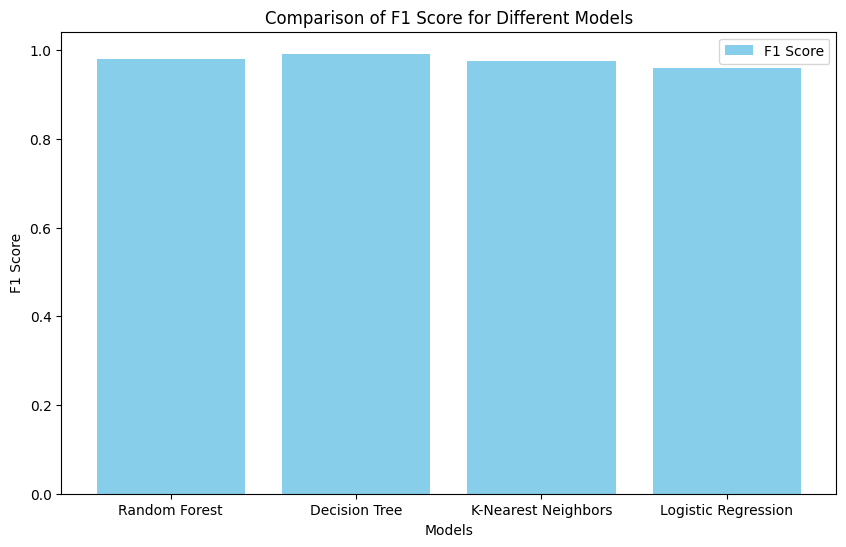

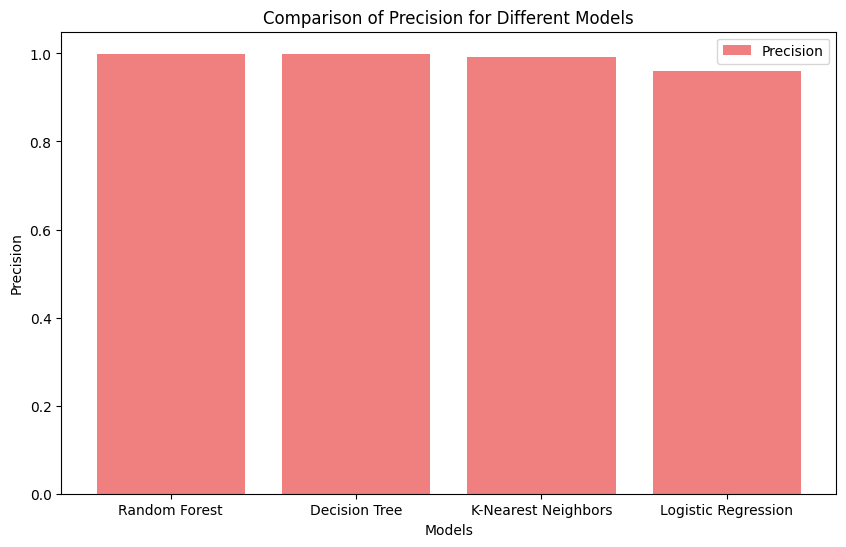

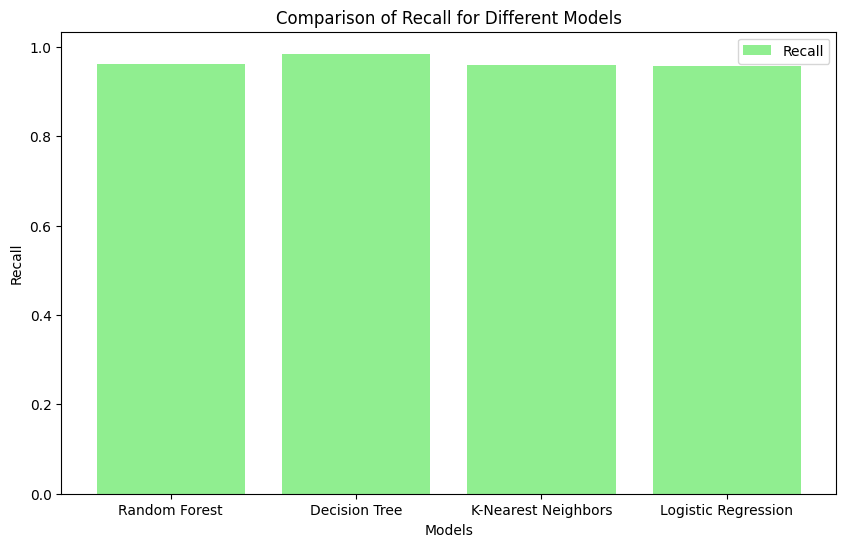

In [127]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression']
f1_scores =  [0.9796847179398099, 0.991985018083105, 0.9754116108469527, 0.9590309574249983]
precisions =  [0.9981063622688258, 0.9993076829880402, 0.9908500642255107, 0.9606393538008694]
recall = [0.9619307521746546, 0.9847688896469384, 0.9604468702029678, 0.9574279379157428]

# Create a bar plot for F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue', label='F1 Score')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score for Different Models')
plt.legend()

# Create a bar plot for precision
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='lightcoral', label='Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.legend()

# Create a bar plot for recall
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color='lightgreen', label='Recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.legend()

# Show the plots
plt.show()


In [148]:
import pandas as pd

# Create a dictionary to store the results of each model
results_test = {
    'Model': ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors','Logistic Regression'],
    'F1 Score': [0.7151841868823, 0.7358586559363581, 0.7503222242680906,0.7211293682018051 ],
    'Precision': [0.9094407696933253, 0.904984,0.9165542060278903,0.8879516698962726],
    'Recall': [0.5893079800498753, 0.621259,0.6351309226932669,0.607076059850374]
}

# Create a DataFrame from the results dictionary
results_test_df = pd.DataFrame(results_test)

# Display the results
print("TEST DATA")
print(results_test_df)

TEST DATA
                 Model  F1 Score  Precision    Recall
0        Random Forest  0.715184   0.909441  0.589308
1        Decision Tree  0.735859   0.904984  0.621259
2  K-Nearest Neighbors  0.750322   0.916554  0.635131
3  Logistic Regression  0.721129   0.887952  0.607076


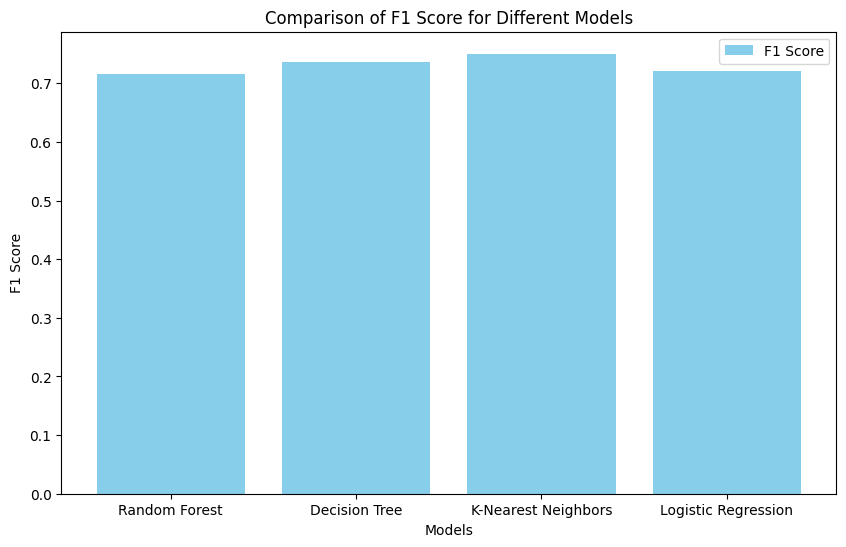

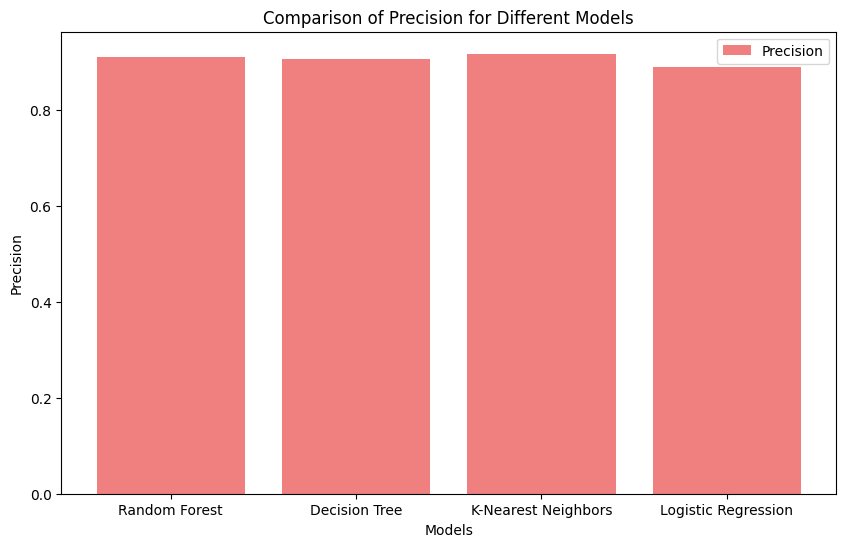

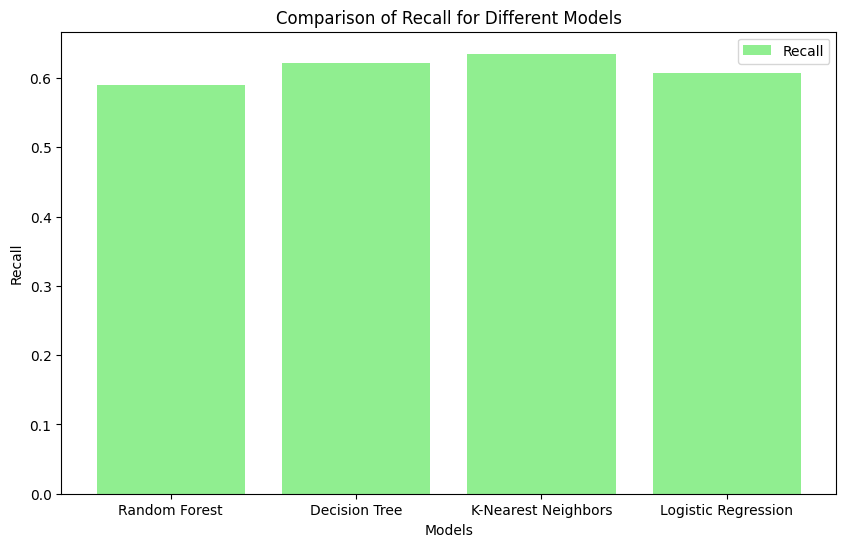

In [152]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression']
f1_scores = [0.7151841868823, 0.7358586559363581, 0.7503222242680906, 0.7211293682018051]
precision = [0.9094407696933253, 0.904984, 0.9165542060278903, 0.8879516698962726]
recall = [0.5893079800498753, 0.621259, 0.6351309226932669, 0.607076059850374]

# Create a bar plot for F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue', label='F1 Score')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score for Different Models')
plt.legend()

# Create a bar plot for precision
plt.figure(figsize=(10, 6))
plt.bar(models, precision, color='lightcoral', label='Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.legend()

# Create a bar plot for recall
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color='lightgreen', label='Recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.legend()

# Show the plots
plt.show()


In [144]:
import pandas as pd

selected_features = ['flag', 'serror_rate', 'diff_srv_rate', 'srv_serror_rate',
                     'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_diff_srv_rate',
                     'count', 'service', 'dst_host_count', 'rerror_rate',
                     'srv_rerror_rate', 'dst_host_rerror_rate', 'protocol_type',
                     'dst_host_srv_rerror_rate']

# Create a new DataFrame with only the selected features
new_df = data_train[selected_features]

# Now new_df contains only the columns specified in selected_features


In [145]:
new_df

,flag,serror_rate,diff_srv_rate,srv_serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_diff_srv_rate,count,service,dst_host_count,rerror_rate,srv_rerror_rate,dst_host_rerror_rate,protocol_type,dst_host_srv_rerror_rate
0,SF,0.0,0.15,0.0,0.00,0.00,0.60,13,other,255,0.0,0.0,0.00,udp,0.00
1,S0,1.0,0.07,1.0,1.00,1.00,0.05,123,private,255,0.0,0.0,0.00,tcp,0.00
2,SF,0.2,0.00,0.2,0.03,0.01,0.00,5,http,30,0.0,0.0,0.00,tcp,0.01
3,SF,0.0,0.00,0.0,0.00,0.00,0.00,30,http,255,0.0,0.0,0.00,tcp,0.00
4,REJ,0.0,0.06,0.0,0.00,0.00,0.07,121,private,255,1.0,1.0,1.00,tcp,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,S0,1.0,0.06,1.0,1.00,1.00,0.06,184,private,255,0.0,0.0,0.00,tcp,0.00
125968,SF,0.0,0.00,0.0,0.00,0.00,0.01,2,private,255,0.0,0.0,0.00,udp,0.00
125969,SF,0.0,0.00,0.0,0.72,0.00,0.06,1,smtp,255,0.0,0.0,0.01,tcp,0.00
125970,S0,1.0,0.05,1.0,1.00,1.00,0.05,144,klogin,255,0.0,0.0,0.00,tcp,0.00
